In [1]:
# importing libraries

import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image
from glob import glob

In [3]:
# to mount a drive
from google.colab import drive

In [4]:
#Mounting the drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
#Setting kaggle configuration directory
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Colab Notebooks/Kaggle"
%cd /content/gdrive/My Drive/Colab Notebooks/Kaggle

/content/gdrive/My Drive/Colab Notebooks/Kaggle


In [13]:
#Downloading and unzip dataset
!kaggle datasets download -d moltean/fruits
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits-360/Training/Tomato 3/127_100.jpg  
  inflating: fruits-360/Training/Tomato 3/128_100.jpg  
  inflating: fruits-360/Training/Tomato 3/129_100.jpg

In [19]:
# Printing Images
# Setting Training & Test dir paths
train_path = './fruits-360/Training/'
test_path = './fruits-360/Test/'

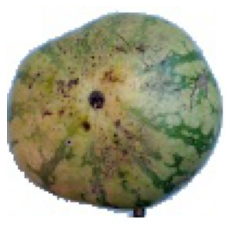

(100, 100, 3)


In [21]:
# Displaying the image
img = load_img(train_path + "Watermelon/r_250_100.jpg", target_size=(100, 100))
plt.imshow(img)
plt.axis("off")
plt.show()

# Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)

In [22]:
# Storing occurences of fruits in a list
fruits = []
fruits_image = []
for i in os.listdir(train_path):
    for image_filename in os.listdir(train_path + i):
        fruits.append(i) 
        fruits_image.append(i + '/' + image_filename)

In [24]:
# Finding top 4 frequent Fruits
newData = Counter(fruits)
frequent_fruits = newData.most_common(4)
print("Top 4 frequent Fruits:")
frequent_fruits

Top 4 frequent Fruits:


[('Grape Blue', 984),
 ('Plum 3', 900),
 ('Cherry 2', 738),
 ('Cherry Rainier', 738)]

In [25]:
# Finding number of classes
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

131


In [26]:
# Creating the model

model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class)) 
model.add(Activation("softmax"))

# Compiling the model

model.compile(loss = "categorical_crossentropy",
optimizer = "rmsprop",
metrics = ["accuracy"])

# Getting model's summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        1

In [27]:
# Specifing epochs & batch size
epochs = 50
batch_size = 64

In [28]:
# Creating an object of ImageDataGenerator.

train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)

# Generating batches of Augmented data.

train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

# test generator

test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [29]:
# Fitting the model
hist = model.fit_generator(
generator = train_generator,
steps_per_epoch = 1600 // batch_size,
epochs=epochs,
validation_data = test_generator,
validation_steps = 800 // batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
25/25 [==============================] - 33s 1s/step - loss: 4.6494 - accuracy: 0.0400 - val_loss: 4.2325 - val_accuracy: 0.0573
Epoch 2/50
25/25 [==============================] - 32s 1s/step - loss: 4.0252 - accuracy: 0.0675 - val_loss: 3.5127 - val_accuracy: 0.1615
Epoch 3/50
25/25 [==============================] - 31s 1s/step - loss: 3.4392 - accuracy: 0.1394 - val_loss: 2.8116 - val_accuracy: 0.1901
Epoch 4/50
25/25 [==============================] - 31s 1s/step - loss: 2.9955 - accuracy: 0.2062 - val_loss: 2.3724 - val_accuracy: 0.3828
Epoch 5/50
25/25 [==============================] - 30s 1s/step - loss: 2.5908 - accuracy: 0.2829 - val_loss: 2.3776 - val_accuracy: 0.3138
Epoch 6/50
25/25 [==============================] - 30s 1s/step - loss: 2.2257 - accuracy: 0.3669 - val_loss: 1.5802 - val_accuracy: 0.5924
Epoch 7/50
25/25 [==============================] - 31s 1s/step - loss: 1.9987 - accuracy: 0.4144 - val_loss: 1.6345 - val_accuracy: 0.5286
Epoch 8/50
25/25 [==

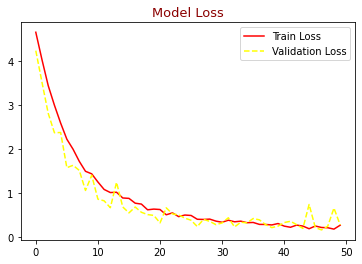

In [30]:
# Plotting train & validation loss
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "red")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "yellow", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

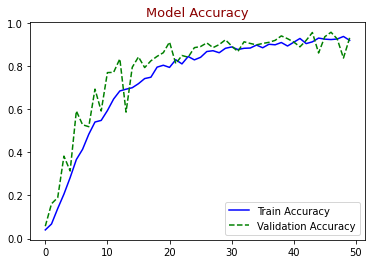

In [31]:
# Plotting train & validation accuracy
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "blue")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "green", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()
